# Analysis

In this project, we will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) institute in Queensland, Australia. The dataset for this project is [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In the project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import numpy as np
import pandas as pd
survey = pd.read_csv('dete-exit-survey-january-2014.csv')
survey.head()
# survey.info()
#survey.isnull().sum()

survey.info()

def unique_data(data):
    for i, col in enumerate(data.columns):
        print("The {} colomn is {}".format(i, col))
        print(survey[col].unique())
        print("\n")

unique_data(survey)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

# Making Decisions How To Cleaning Up
First of all, we checked all unique values by each column, and we fined some "Not Stated", which should be Nan. So, we will take "Not Stated" as Nan value since reading csv file.

Also, according to the information of the return of `unique_data` function, all columns after `Employment conditions` except for `Work life balance` and `Workload` are not important for the purpose of this project. We will drop those columns. 

Moreover, because we have to focus on suttisfactions of employees,  the folloing columns could be droped: 'Position', 'Classification', 'Region', 'Business Unit', 'Career move to public sector', 'Career move to private sector'.

As for the convenience, we rename columns like below.
{'SeparationType': 'separation_type'}

We will rename the all columns as regurated format, snake_case and lower characters.

In [2]:
survey = pd.read_csv('dete-exit-survey-january-2014.csv', na_values="Not Stated")
print(type(survey.columns[20:25]))
survey = survey.drop(survey.columns[51:], axis=1)
survey = survey.drop(survey.columns[27:50], axis=1)
survey = survey.drop(survey.columns[20:25], axis=1)
drop_col = ['Position', 'Classification', 'Region', 'Business Unit', 'Career move to public sector', 'Career move to private sector']
survey = survey.drop(drop_col, axis=1)
col_dict = {'SeparationType': 'separation_type'}
survey.rename(col_dict, axis=1, inplace=True)
survey.columns = survey.columns.str.replace(" ", "_").str.lower()
print(survey.isnull().sum())
unique_data(survey)

<class 'pandas.core.indexes.base.Index'>
id                                      0
separation_type                         0
cease_date                             34
dete_start_date                        73
role_start_date                        98
employment_status                       5
interpersonal_conflicts                 0
job_dissatisfaction                     0
dissatisfaction_with_the_department     0
physical_work_environment               0
lack_of_recognition                     0
lack_of_job_security                    0
work_location                           0
employment_conditions                   0
work_life_balance                       0
workload                                0
age                                    11
dtype: int64
The 0 colomn is id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  5

In [3]:
print(survey['cease_date'].value_counts())
years = survey['cease_date'].str.extract(r'\d*/?(?P<Year>20[0-1][0-6])')
survey['cease_date'] = years['Year'].astype(float)
print(survey['cease_date'].value_counts())

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
08/2012      2
04/2013      2
02/2014      2
07/2014      2
04/2014      2
07/2006      1
09/2010      1
09/2014      1
2014         1
07/2012      1
11/2012      1
2010         1
Name: cease_date, dtype: int64
2013.0    380
2012.0    354
2014.0     51
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [4]:
print(survey['dete_start_date'].value_counts(dropna=False).sort_index())
print(survey['role_start_date'].value_counts(dropna=False).sort_index())

 1963.0     4
 1965.0     1
 1966.0     1
 1967.0     2
 1968.0     3
 1969.0    10
 1970.0    21
 1971.0    10
 1972.0    12
 1973.0     8
 1974.0    14
 1975.0    21
 1976.0    15
 1977.0    11
 1978.0    15
 1979.0    14
 1980.0    14
 1981.0     9
 1982.0     4
 1983.0     9
 1984.0    10
 1985.0     8
 1986.0    12
 1987.0     7
 1988.0    15
 1989.0    17
 1990.0    20
 1991.0    18
 1992.0    18
 1993.0    13
 1994.0    10
 1995.0    14
 1996.0    19
 1997.0    14
 1998.0    14
 1999.0    19
 2000.0    18
 2001.0    10
 2002.0    15
 2003.0    15
 2004.0    18
 2005.0    20
 2006.0    23
 2007.0    34
 2008.0    31
 2009.0    24
 2010.0    27
 2011.0    40
 2012.0    27
 2013.0    21
NaN        73
Name: dete_start_date, dtype: int64
 200.0      1
 1970.0     2
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     1
 1975.0    12
 1976.0     9
 1977.0     2
 1978.0     9
 1979.0     7
 1980.0     3
 1981.0     5
 1982.0     4
 1983.0     5
 1984.0     4
 1985.0     6
 1986.0    1

In [5]:
survey.loc[survey['role_start_date']<1900, 'role_start_date'] = np.nan
print(survey['role_start_date'].value_counts(dropna=False).sort_index())

 1970.0     2
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     1
 1975.0    12
 1976.0     9
 1977.0     2
 1978.0     9
 1979.0     7
 1980.0     3
 1981.0     5
 1982.0     4
 1983.0     5
 1984.0     4
 1985.0     6
 1986.0    11
 1987.0     5
 1988.0    14
 1989.0    18
 1990.0    12
 1991.0     8
 1992.0    17
 1993.0     9
 1994.0     7
 1995.0    13
 1996.0    19
 1997.0    13
 1998.0    15
 1999.0    19
 2000.0    20
 2001.0    15
 2002.0    16
 2003.0    20
 2004.0    22
 2005.0    20
 2006.0    25
 2007.0    41
 2008.0    45
 2009.0    38
 2010.0    46
 2011.0    57
 2012.0    65
 2013.0    41
NaN        99
Name: role_start_date, dtype: int64


In [6]:
print(survey['age'].value_counts(dropna=False).sort_index())

20 or younger      1
21-25             40
26-30             57
31-35             39
36-40             51
41-45             61
46-50             63
51-55            103
56-60            174
61 or older      222
NaN               11
Name: age, dtype: int64


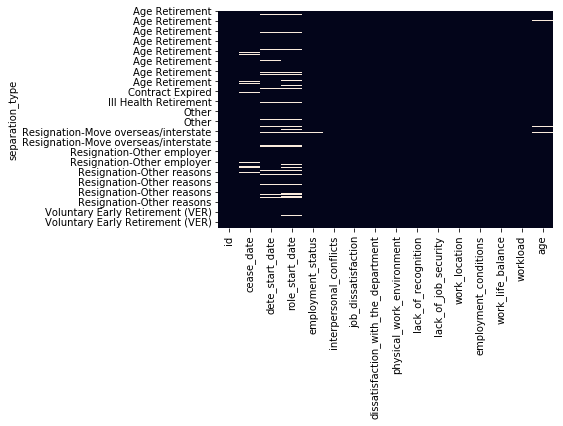

In [7]:
%matplotlib inline
import seaborn as sns
def check_heatmap(df):
    survey_sep = df.set_index('separation_type').sort_index()
    sns.heatmap(survey_sep.isnull(), cbar=False)
check_heatmap(survey)

In [8]:
survey[['cease_date', 'dete_start_date', 'role_start_date']].sort_index().head(10)

cease_date  dete_start_date  role_start_date
0      2012.0           1984.0           2004.0
1      2012.0              NaN              NaN
2      2012.0           2011.0           2011.0
3      2012.0           2005.0           2006.0
4      2012.0           1970.0           1989.0
5      2012.0           1994.0           1997.0
6      2012.0           1972.0           2007.0
7      2012.0           1988.0           1990.0
8      2012.0           2009.0           2009.0
9      2012.0           1997.0           2008.0

In [9]:
survey['institute_service'] = survey['cease_date'] - survey['dete_start_date']
survey['institute_service'].value_counts(dropna=False).sort_index(ascending=False)

 50.0      1
 49.0      3
 48.0      1
 46.0      1
 45.0      5
 44.0      7
 43.0     17
 42.0     13
 41.0     11
 40.0      8
 39.0     14
 38.0     15
 37.0     21
 36.0      7
 35.0     14
 34.0     12
 33.0     11
 32.0     12
 31.0     10
 30.0      4
 29.0      8
 28.0      8
 27.0      7
 26.0     11
 25.0     10
 24.0     16
 23.0     17
 22.0     22
 21.0     15
 20.0     12
 19.0     13
 18.0     11
 17.0     16
 16.0     15
 15.0     18
 14.0     14
 13.0     18
 12.0     14
 11.0     13
 10.0     13
 9.0      20
 8.0      14
 7.0      17
 6.0      27
 5.0      34
 4.0      28
 3.0      31
 2.0      23
 1.0      36
 0.0      31
NaN      103
Name: institute_service, dtype: int64

In [10]:
unique_data(survey.iloc[:,6:-2])
survey_dissatisfaction = survey.iloc[:, 6:-2]
survey['dissatisfied'] = survey_dissatisfaction.any(axis=1)
survey['dissatisfied'].value_counts()

The 0 colomn is interpersonal_conflicts
[False  True]


The 1 colomn is job_dissatisfaction
[ True False]


The 2 colomn is dissatisfaction_with_the_department
[False  True]


The 3 colomn is physical_work_environment
[False  True]


The 4 colomn is lack_of_recognition
[ True False]


The 5 colomn is lack_of_job_security
[False  True]


The 6 colomn is work_location
[False  True]


The 7 colomn is employment_conditions
[False  True]


The 8 colomn is work_life_balance
[False  True]


The 9 colomn is workload
[False  True]




False    440
True     382
Name: dissatisfied, dtype: int64

count    714.000000
mean      18.347339
std       13.916293
min        0.000000
25%        5.000000
50%       16.000000
75%       31.000000
max       50.000000
Name: institute_service, dtype: float64
0.0     30
1.0     36
2.0     23
3.0     31
4.0     28
5.0     34
6.0     27
7.0     17
8.0     14
9.0     20
10.0    13
11.0    13
12.0    14
13.0    17
14.0    14
15.0    18
16.0    15
17.0    16
18.0    11
19.0    13
20.0    12
21.0    15
22.0    22
23.0    16
24.0    16
25.0    10
26.0    11
27.0     7
28.0     8
29.0     8
30.0     4
31.0    10
32.0    12
33.0    11
34.0    12
35.0    14
36.0     7
37.0    20
38.0    15
39.0    14
40.0     8
41.0    11
42.0    12
43.0    17
44.0     7
45.0     5
46.0     1
48.0     1
49.0     3
50.0     1
Name: institute_service, dtype: int64
Experienced    201
Established    184
Veteran        181
New            118
Name: service_level, dtype: int64


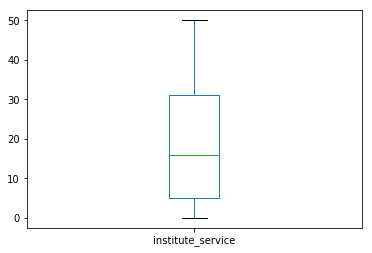

In [11]:
survey_agg = survey[['separation_type', 'institute_service', 'dissatisfied', 'age']].dropna(axis=0)
survey_agg['institute_service'].plot(kind='box')
print(survey_agg['institute_service'].describe())
print(survey_agg['institute_service'].value_counts().sort_index())

survey_agg.loc[survey_agg['institute_service'].between(1,4), 'service_level'] = 'New'
survey_agg.loc[survey_agg['institute_service'].between(5,15), 'service_level'] = 'Experienced'
survey_agg.loc[survey_agg['institute_service'].between(16,30), 'service_level'] = 'Established'
survey_agg.loc[survey_agg['institute_service'].between(31,50), 'service_level'] = 'Veteran'

print(survey_agg['service_level'].value_counts())

               dissatisfied
service_level              
New                0.338983
Established        0.461957
Experienced        0.487562
Veteran            0.624309


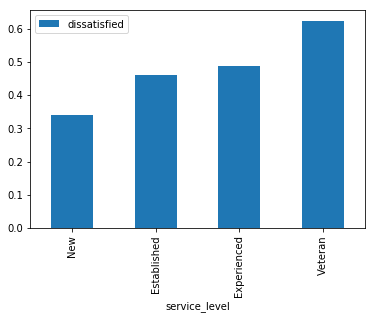

In [12]:
pv = pd.pivot_table(survey_agg, values='dissatisfied', index='service_level').sort_values('dissatisfied')
print(pv)
pv.plot(kind='bar')

               dissatisfied
age                        
20 or younger      0.000000
21-25              0.297297
26-30              0.568627
31-35              0.486486
36-40              0.369565
41-45              0.535714
46-50              0.509434
51-55              0.589474
56-60              0.582192
61 or older        0.395833


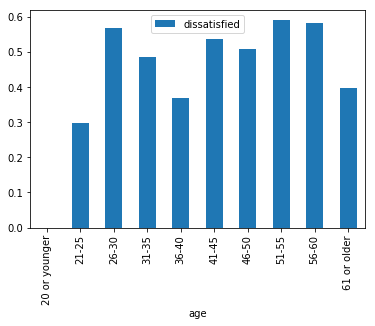

In [13]:
pv = pd.pivot_table(survey_agg, values='dissatisfied', index='age')
print(pv)
pv.plot(kind='bar')

In [38]:
age_col = []
survey_agg_new = survey_agg.copy()
survey_agg_new.loc[survey_agg_new['dissatisfied']==True, 'dissatisfied'] = 'Not Satisfied'
survey_agg_new.loc[survey_agg_new['dissatisfied']==False, 'dissatisfied'] = 'Satisfied'

for col in survey_agg_new['age'].unique():
    survey_agg_new[col] = survey_agg_new.loc[survey_agg_new['age']==col, 'dissatisfied']
    age_col.append(col)

survey_agg_new

separation_type  institute_service   dissatisfied  \
0                   Ill Health Retirement               28.0  Not Satisfied   
2        Voluntary Early Retirement (VER)                1.0      Satisfied   
3               Resignation-Other reasons                7.0      Satisfied   
4                          Age Retirement               42.0  Not Satisfied   
5               Resignation-Other reasons               18.0  Not Satisfied   
6                          Age Retirement               40.0  Not Satisfied   
7                          Age Retirement               24.0      Satisfied   
8               Resignation-Other reasons                3.0      Satisfied   
9              Resignation-Other employer               15.0  Not Satisfied   
10                         Age Retirement               13.0  Not Satisfied   
11   Resignation-Move overseas/interstate                3.0      Satisfied   
12              Resignation-Other reasons               14.0      Satisfied   
13                         Age Retirement               45.0  Not Satisfied   
14             Resignation-Other employer                5.0  Not Satisfied   
15       Voluntary Early Retirement (VER)               17.0      Satisfied   
17                         Age Retirement               16.0      Satisfied   
18                         Age Retirement                6.0      Satisfied   
19                         Age Retirement               23.0      Satisfied   
20             Resignation-Other employer               30.0      Satisfied   
21              Resignation-Other reasons               32.0  Not Satisfied   
22              Resignation-Other reasons               15.0  Not Satisfied   
23              Resignation-Other reasons               39.0  Not Satisfied   
24                         Age Retirement               31.0      Satisfied   
25              Resignation-Other reasons               17.0  Not Satisfied   
26                         Age Retirement               38.0  Not Satisfied   
27             Resignation-Other employer                7.0      Satisfied   
28                         Age Retirement               23.0      Satisfied   
29                         Age Retirement               37.0      Satisfied   
30                         Age Retirement               23.0  Not Satisfied   
31                         Age Retirement               34.0      Satisfied   
..                                    ...                ...            ...   
778                        Age Retirement               21.0      Satisfied   
779                        Age Retirement               21.0      Satisfied   
780                        Age Retirement               11.0      Satisfied   
781                        Age Retirement               24.0  Not Satisfied   
782      Voluntary Early Retirement (VER)               44.0      Satisfied   
783                      Contract Expired                0.0      Satisfied   
784             Resignation-Other reasons                0.0  Not Satisfied   
785                        Age Retirement               22.0      Satisfied   
786            Resignation-Other employer               20.0  Not Satisfied   
787                        Age Retirement               37.0  Not Satisfied   
789             Resignation-Other reasons               31.0      Satisfied   
790             Resignation-Other reasons                6.0  Not Satisfied   
793                 Ill Health Retirement               10.0      Satisfied   
800                                 Other                3.0  Not Satisfied   
801                 Ill Health Retirement               42.0      Satisfied   
803            Resignation-Other employer               10.0      Satisfied   
804            Resignation-Other employer                6.0      Satisfied   
806            Resignation-Other employer                8.0      Satisfied   
807             Resignation-Other reasons                9.0  Not Satisfied 

               20 or younger  21-25  26-30  31-35  36-40  41-45  46-50  51-55  \
dissatisfied                                                                    
Not Satisfied              0     11     29     18     17     30     27     56   

               56-60  61 or older  
dissatisfied                       
Not Satisfied     85           76  


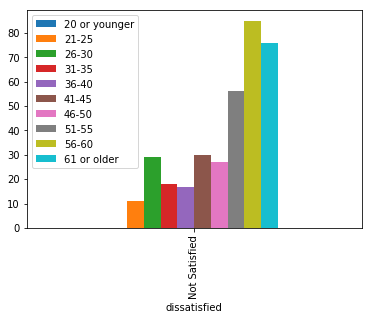

In [40]:
pv = pd.pivot_table(survey_agg_new[survey_agg_new['dissatisfied']=='Not Satisfied'], values=age_col, index='dissatisfied', aggfunc='count')
print(pv)
pv.plot(kind='bar')